HTTP Status: 200
Please Enter Folder Path to Download ReportC:/Users/ahame/OneDrive/Desktop/automationProject


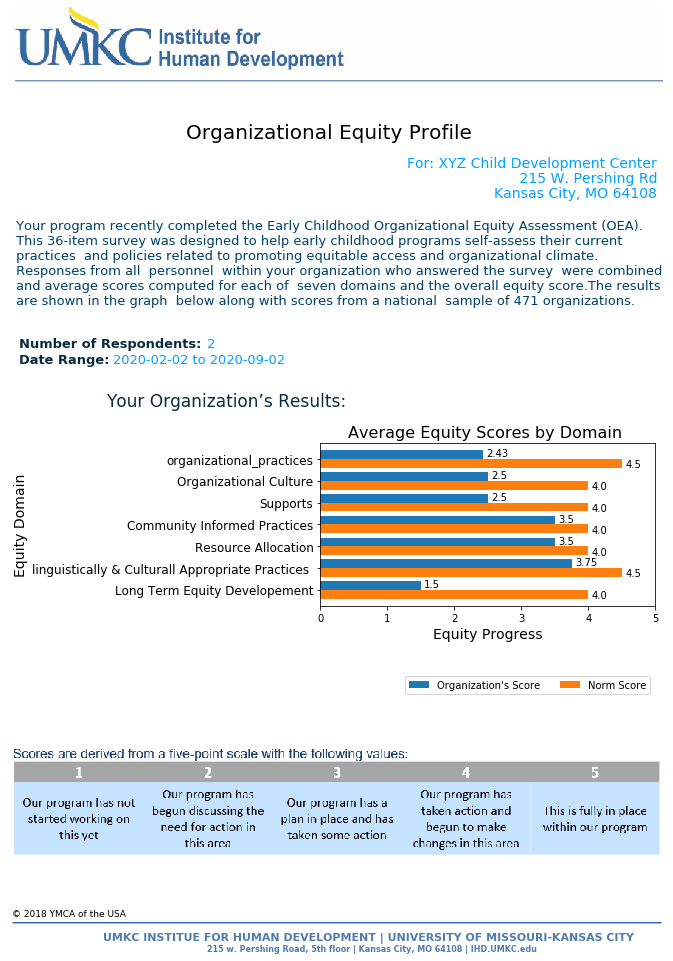

In [135]:
#!/usr/bin/env python
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook 
import matplotlib.image as image 
import os


from io import StringIO

data = {
    'token': '275E68BE933632E7DB94F61D444F6B11',
    'content': 'report',
    'format': 'csv',
    'report_id': '2072',
    'csvDelimiter': '',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'json'
}
r = requests.post('https://redcap.umkc.edu/api/', data=data)
print('HTTP Status: ' + str(r.status_code))
# print(r.text)
reportdata = pd.read_csv(StringIO(r.text))

# get start and end date from html inputs
start_date = pd.to_datetime("02/02/2020")
end_date = pd.to_datetime("09/02/2020")
# start_date = pd.to_datetime(input("Please enter Start date(mm/dd/yyyy)"))
# end_date = pd.to_datetime(input("Please enter End Date(mm/dd/yyyy)"))



mask = (pd.to_datetime(reportdata['today_s_date']) >= start_date) & (
            pd.to_datetime(reportdata['today_s_date']) <= end_date)
reportdata = reportdata.loc[mask]

Number_of_Respondents = str(reportdata.shape[0])
Date_Range = str(start_date.date()) + " to " + str(end_date.date())

meanofall = list(reportdata.iloc[:, 2:].mean(axis=0))
meanofall = list([round(x, 2) for x in meanofall])
meannorm = list([4.50, 4.00, 4.00, 4.00, 4.00, 4.50, 4.00])

columns = ['organizational_practices', 'Organizational Culture', 'Supports', 'Community Informed Practices',
           'Resource Allocation',
           'linguistically & Culturall Appropriate Practices ', 'Long Term Equity Developement']
ypos = np.arange(len(columns))
xpos = np.arange(6)
score_label = np.arange(0, 100, 10)
bar_width = 0.4
fig, ax = plt.subplots()
domainbar = ax.barh(ypos, meanofall, bar_width, label="Organization's Score")
normbar = ax.barh((ypos)+bar_width, meannorm, bar_width, label="Norm Score")

ax.set_yticks(ypos+.20)
ax.set_xticks(xpos)

ax.set_yticklabels(columns,fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Equity Progress',fontsize=14)
ax.set_ylabel('Equity Domain',fontsize=14)
ax.set_title("Average Equity Scores by Domain ",fontsize=16)
ax.legend(bbox_to_anchor=(1.0, -.4),loc="upper right", ncol=len(columns))
fig = plt.gcf()
fig.set_size_inches(6, 3)
# plt.figtext(5, 7, "xyzzzz")
#ax.text(5.2, .4, Date_Range)
#ax.text(5.2, .8, Number_of_Respondents)


        
ax.text(-2,-14.5,"Organizational Equity Profile",fontsize=20)
ax.text(1.3,-13.2,"For: XYZ Child Development Center",fontsize=14 ,color = '#00a2ff')
ax.text(2.9,-12.5," 215 W. Pershing Rd ",fontsize=14,color = '#00a2ff') 
ax.text(2.6,-11.8,"Kansas City, MO 64108",fontsize=14,color = '#00a2ff')
para =" Your program recently completed the Early Childhood Organizational Equity Assessment (OEA). \n This 36-item survey was designed to help early childhood programs self-assess their current \n practices  and policies related to promoting equitable access and organizational climate. \n Responses from all  personnel  within your organization who answered the survey  were combined \n and average scores computed for each of  seven domains and the overall equity score.The results \n are shown in the graph  below along with scores from a national  sample of 471 organizations."
ax.text(-4.6,-6.9,para,fontsize=13,color='#014166')
ax.text(-3.2,-2.2,"Your Organization’s Results:",fontsize=17,color='#0a2b3d')
ax.text(-4.5, -4.2, "Date Range: ",fontsize=13,color='#0a2b3d',weight = 'bold')
ax.text(-3.1, -4.2, Date_Range,fontsize=13,color='#00a2ff')

ax.text(-4.5, -4.9, "Number of Respondents: ",fontsize=13,color='#0a2b3d',weight = 'bold')
ax.text(-1.7, -4.9, Number_of_Respondents,fontsize=13,color='#00a2ff')    

ax.text(-4.6,21.2,"© 2018 YMCA of the USA",fontsize=9)
ax.text(-3.25,22.3,"UMKC INSTITUE FOR HUMAN DEVELOPMENT | UNIVERSITY OF MISSOURI-KANSAS CITY",color= '#527bab',weight = 'bold',fontsize=11)
ax.text(-1.7,22.8,"215 w. Pershing Road, 5th floor | Kansas City, MO 64108 | IHD.UMKC.edu",color= '#527bab',weight = 'bold',fontsize=8)

        


for y, x in enumerate(meanofall):
    ax.annotate(x, xy=(x + 0.05, y+.1))

for y, x in enumerate(meannorm):
    ax.annotate(x, xy=(x + .05, y+.60))
    
    
#logos:

from matplotlib.cbook import get_sample_data

# with cbook.get_sample_data('https://raw.githubusercontent.com/Ahamedrazi11-08/Organizational-Quity-Profile/master/logo.png') as image_file: 
#     logoheader = plt.imread(image_file) 

logoheader = plt.imread("https://raw.githubusercontent.com/Ahamedrazi11-08/Organizational-Quity-Profile/master/logofinal1.PNG")
footer = plt.imread("https://raw.githubusercontent.com/Ahamedrazi11-08/Organizational-Quity-Profile/master/footerfinal.PNG")
scale = plt.imread("https://raw.githubusercontent.com/Ahamedrazi11-08/Organizational-Quity-Profile/master/scalefinal.PNG")



#header logo
newax = fig.add_axes([-.6, 1.4, 1.52, 1.5], anchor='NE')
#newax = fig.add_axes([.4, .8, 1.4, 1.58], anchor='NE')
newax.imshow(logoheader)
newax.axis('off')

#footer logo
newaxfoot = fig.add_axes([-.6, -2.9, 1.52, 1.58], anchor='NE')
#newax = fig.add_axes([.4, .8, .4, 1.58], anchor='NE')
newaxfoot.imshow(footer)
newaxfoot.axis('off')

#scale 
newaxscale = fig.add_axes([-.6, -2.1, 1.52, 1.58], anchor='NE')
#newax = fig.add_axes([.4, .8, .4, 1.58], anchor='NE')
newaxscale.imshow(scale )
newaxscale.axis('off')




#filepath = r"C:/Users/ahame/OneDrive/Desktop/automationProject/" + Date_Range
folderpath = input("Please Enter Folder Path to Download Report")
filepath = folderpath +"/"+ "Report_"+ Date_Range +'.pdf'

finalpath = os.path.join(filepath)
#finalpath = filepath + Date_Range + ".pdf"
fig.savefig(finalpath, dpi=100,bbox_inches='tight')
plt.show()